In [455]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [456]:
# Import data
train_data = pd.read_csv(r'/content/train_values.csv')
train_labels = pd.read_csv(r'/content/train_labels.csv')
test_data = pd.read_csv(r'/content/test_values.csv')

In [457]:
print(train_data.shape)
train_data.head(5)

(180, 14)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [458]:
print(train_labels.shape)
train_labels.head(5)

(180, 2)


,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [459]:
print(test_data.shape)
test_data.head(5)

(90, 14)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


#### Analysing the 'train_data' dataset

In [460]:
# Renaming the columns
train_data.columns = ["patient_id", "slope", "thal", "rbs", "chest_pain", "vessels", "fasting_blood_sugar", "resting_ekg",
                      "cholesterol", "depression", "sex", "age", "heart_rate", "angina"]

print(train_data.shape)
train_data.head(5)

(180, 14)


,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [461]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           180 non-null    object 
 1   slope                180 non-null    int64  
 2   thal                 180 non-null    object 
 3   rbs                  180 non-null    int64  
 4   chest_pain           180 non-null    int64  
 5   vessels              180 non-null    int64  
 6   fasting_blood_sugar  180 non-null    int64  
 7   resting_ekg          180 non-null    int64  
 8   cholesterol          180 non-null    int64  
 9   depression           180 non-null    float64
 10  sex                  180 non-null    int64  
 11  age                  180 non-null    int64  
 12  heart_rate           180 non-null    int64  
 13  angina               180 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [462]:
# We have 1 object column 'thal', so let's deal with it so that it will be easier to analyse later
train_data['thal'].value_counts()

,count
thal,
normal,98
reversible_defect,74
fixed_defect,8


In [463]:
train_data['thal'] = train_data['thal'].map({'normal':0, 'reversible_defect':1, 'fixed_defect':2})
train_data.head(5)

,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
0,0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,0,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0


In [464]:
train_labels.head(5)

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [465]:
# Concat the 'target' column in our original dataset
train_data["heart_disease"] = train_labels["heart_disease_present"]
train_data.head(5)

,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina,heart_disease
0,0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0


In [466]:
# Make a copy to be used later on
data = train_data.copy()

In [467]:
# Drop off the 'patient_id' column
train_data = train_data.drop("patient_id", axis=1)
train_data.head(5)

,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina,heart_disease
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0


#### Analysing the 'test_data' dataset

In [468]:
print(test_data.shape)
test_data.head(5)

(90, 14)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [469]:
# Renaming the columns
test_data.columns = ["patient_id", "slope", "thal", "rbs", "chest_pain", "vessels", "fasting_blood_sugar", "resting_ekg",
                      "cholesterol", "depression", "sex", "age", "heart_rate", "angina"]

print(test_data.shape)
test_data.head(5)

(90, 14)


,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [470]:
# Let's deal with 'thal' column, so that it will be easy to analyse later
test_data['thal'] = test_data['thal'].map({'normal':0, 'reversible_defect':1, 'fixed_defect':2})
test_data.head(5)

,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
0,olalu7,2,1,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,0,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,1,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,0,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,0,138,4,1,0,2,166,3.6,1,61,125,1


### Exploratory data analysis

In [471]:
train_data.describe()

,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina,heart_disease
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,0.500000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,0.583765,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,0.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,0.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,1.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [472]:
categorical_val = []
continous_val = []

for column in train_data.columns:
    if len(train_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [473]:
print("Categorical features: ")
categorical_val

Categorical features: 


['slope',
 'thal',
 'chest_pain',
 'vessels',
 'fasting_blood_sugar',
 'resting_ekg',
 'sex',
 'angina',
 'heart_disease']

In [474]:
print("Continous features: ")
continous_val

Continous features: 


['rbs', 'cholesterol', 'depression', 'age', 'heart_rate']

##### 1. Age

In [475]:
minAge = min(train_data.age)
maxAge = max(train_data.age)
print('Min Age :', minAge)
print('Max Age :', maxAge)

Min Age : 29
Max Age : 77


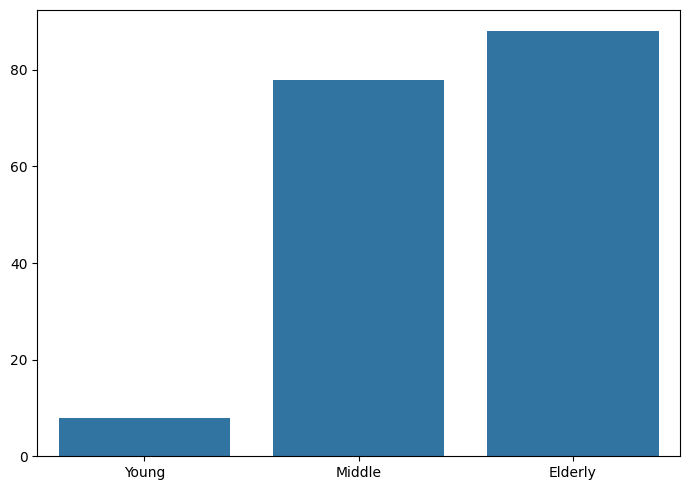

In [476]:
# Dividing the Age feature into three parts – “Young”, “Middle” and “Elder”
Young = train_data[(train_data.age>=29) & (train_data.age<40)]
Middle = train_data[(train_data.age>=40) & (train_data.age<55)]
Elder = train_data[(train_data.age>55)]

plt.figure(figsize=(7,5))
sns.barplot(x=['Young', 'Middle','Elderly'], y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

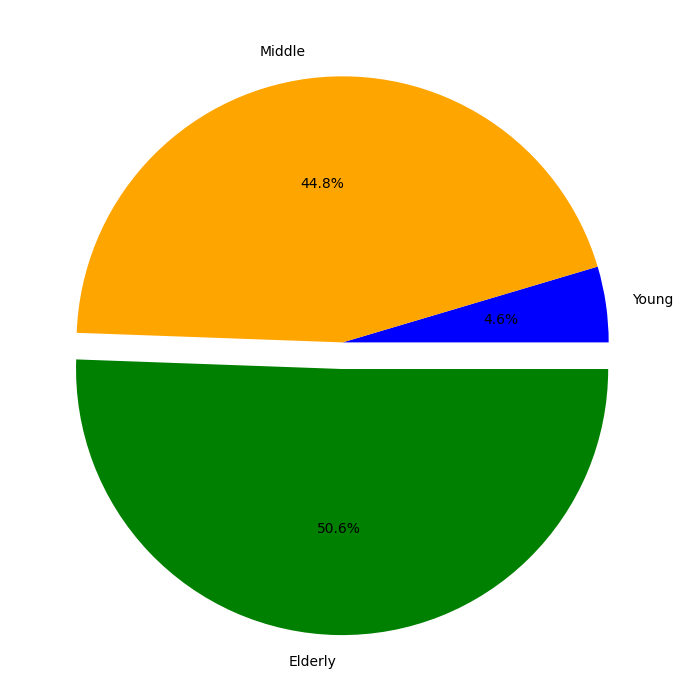

In [477]:
colors = ['blue','orange','green']
explode = [0,0,0.1]
plt.figure(figsize=(7,7))
plt.pie([len(Young),len(Middle),len(Elder)], labels=['Young','Middle','Elderly'],
        explode=explode, colors=colors, autopct='%1.1f%%')
plt.tight_layout()

##### Clearly, elderly people are the most affected by heart disease and young ones are the least affected.

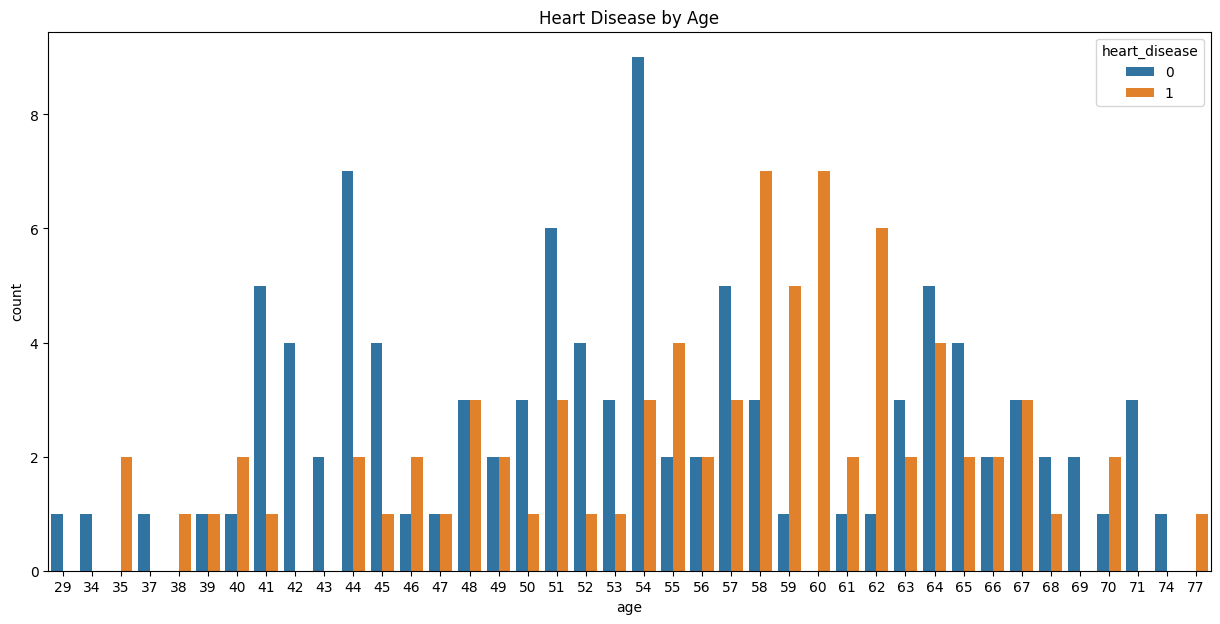

In [478]:
# Plot distribution of Age
# It is clear that older people have more risk getting heart disease (which is expected)
plt.figure(figsize=(15,7))
sns.countplot(x = 'age', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Age")
plt.show()

##### 2. Slope

In [479]:
train_data['slope'].value_counts()

,count
slope,
1,93
2,75
3,12


In [480]:
train_data['slope'].replace([1, 2, 3], ['Upsloping', 'Flat','Downsloping'], inplace=True)

In [481]:
train_data['slope'].value_counts()

,count
slope,
Upsloping,93
Flat,75
Downsloping,12


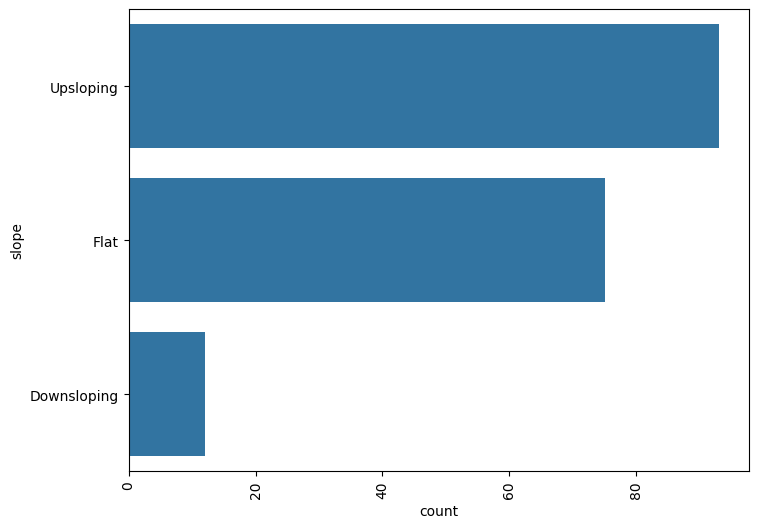

In [482]:
# Plot distribution of slope column
plt.figure(figsize=(8,6))
sns.countplot(train_data['slope'])
plt.xticks(rotation="vertical")
plt.show()

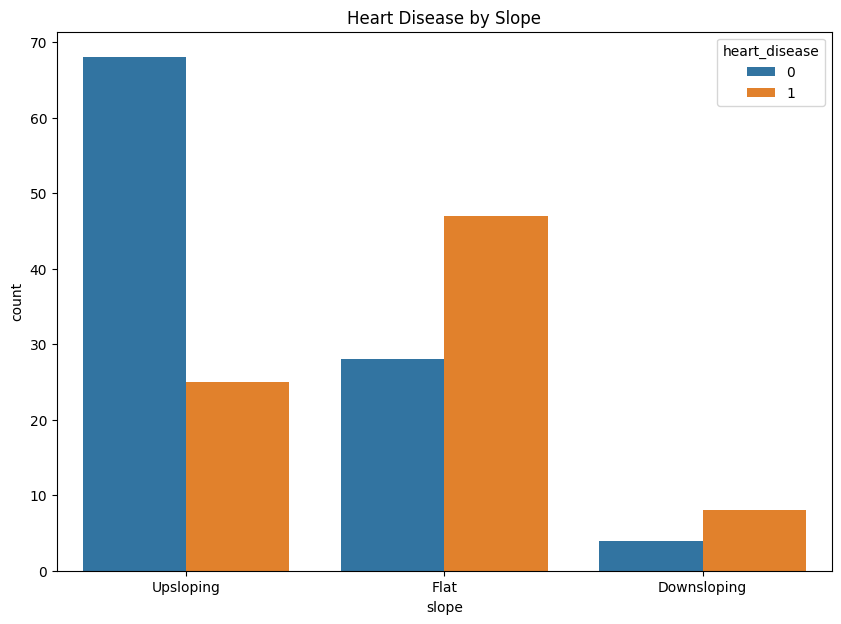

In [483]:
# Plot distribution of slope column with hue on heart_disease
plt.figure(figsize=(10,7))
sns.countplot(x = 'slope', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Slope")
plt.show()

##### 3. Sex

In [484]:
train_data['sex'].value_counts()

,count
sex,
1,124
0,56


In [485]:
train_data['sex'].replace([1, 0], ['Male', 'Female'], inplace=True)

In [486]:
train_data['sex'].value_counts()

,count
sex,
Male,124
Female,56


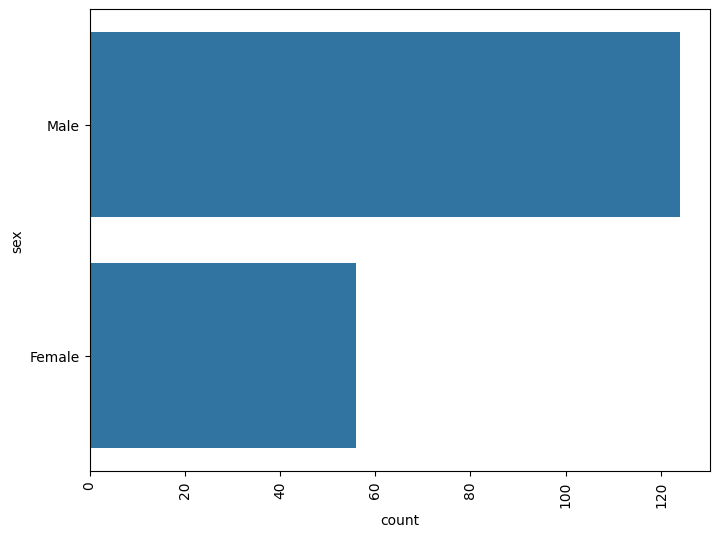

In [487]:
# Plot distribution of sex column
# It is clear that the ratio of Male:Female is approx 2:1.
plt.figure(figsize=(8,6))
sns.countplot(train_data['sex'])
plt.xticks(rotation="vertical")
plt.show()

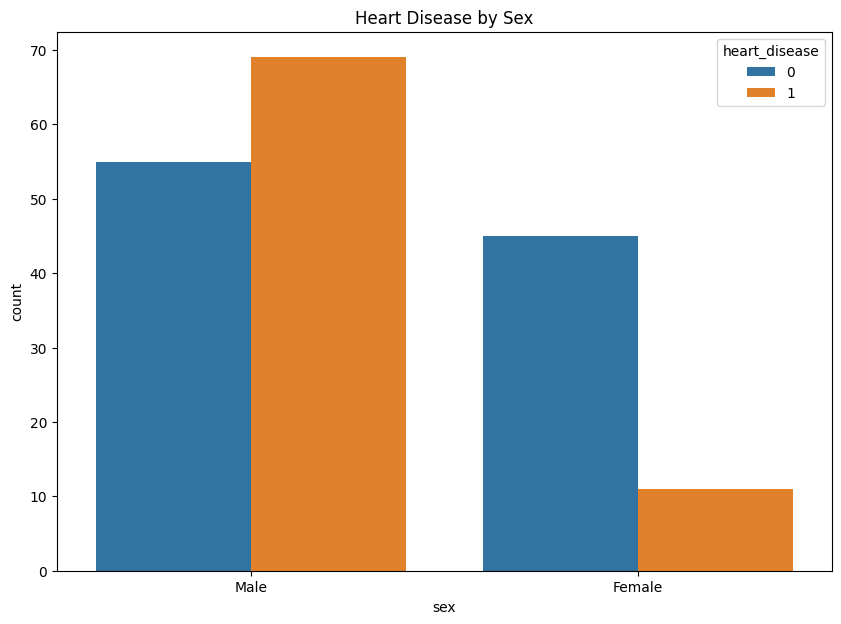

In [488]:
# Plot distribution of sex column with huse on heart_disease
plt.figure(figsize=(10,7))
sns.countplot(x = 'sex', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Sex")
plt.show()

##### Clearly, Males are more likely to have a heart disease.

##### 4. Chest pain type

In [489]:
train_data['chest_pain'].value_counts()

,count
chest_pain,
4,82
3,57
2,28
1,13


In [490]:
train_data['chest_pain'].replace([1,2,3,4], ['Typical Angina','Atypical Angina','Non-Anginal pain','Asmyptomatic'],inplace=True)

In [491]:
train_data['chest_pain'].value_counts()

,count
chest_pain,
Asmyptomatic,82
Non-Anginal pain,57
Atypical Angina,28
Typical Angina,13


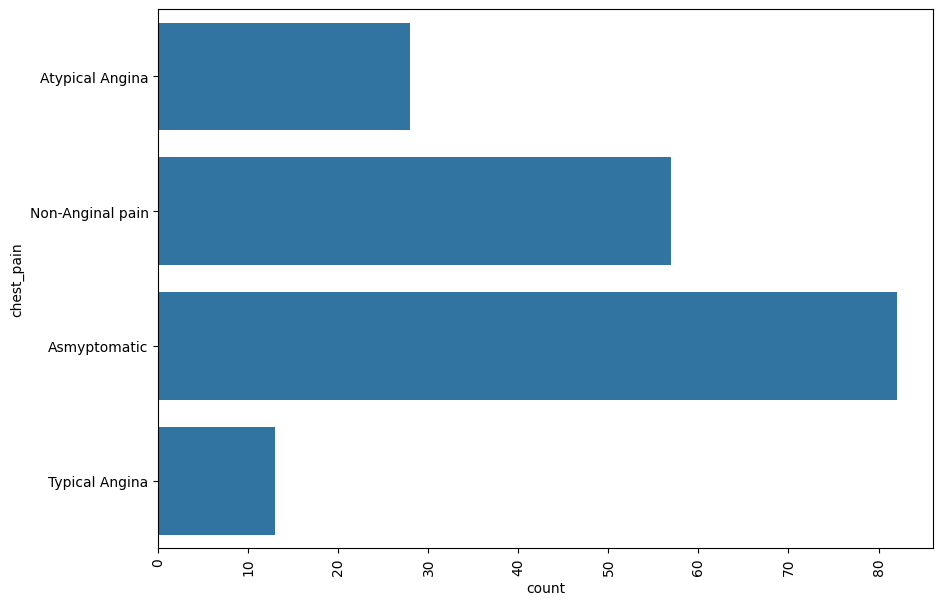

In [492]:
# Plot distribution of chest_pain column
plt.figure(figsize=(10,7))
sns.countplot(train_data['chest_pain'])
plt.xticks(rotation="vertical")
plt.show()

##### There are 4 types of chest pain :
##### 1. condition least distressed
##### 2. condition slightly distressed
##### 3. condition medium distressed
##### 4. condition too bad

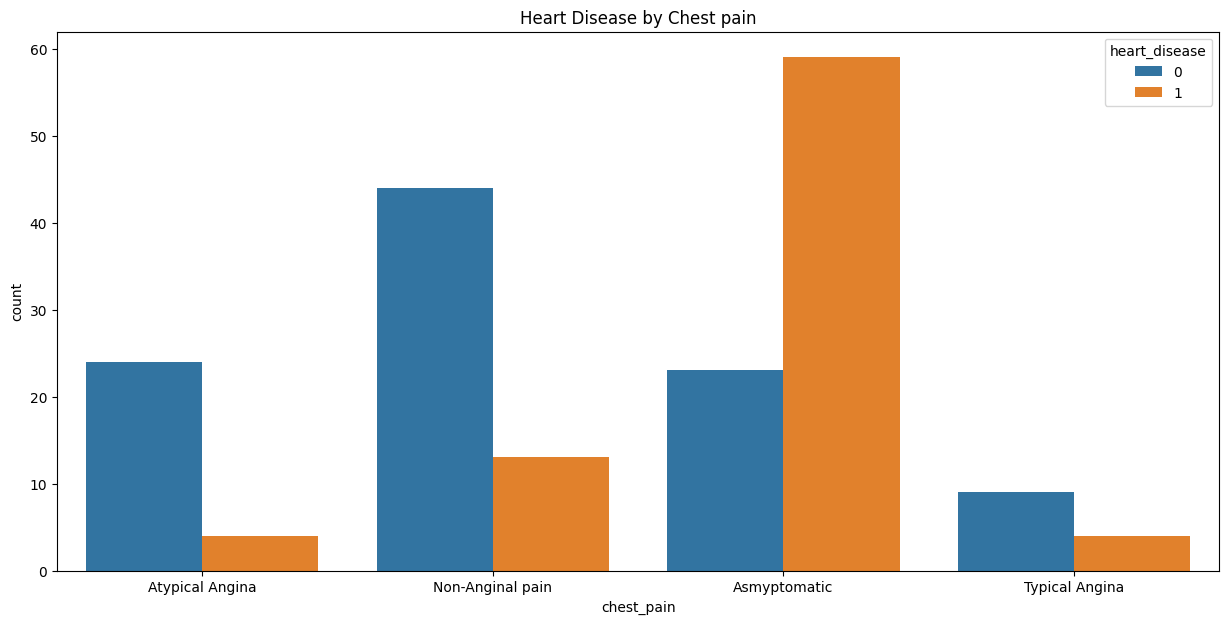

In [493]:
# Plot distribution of chest_pain_type
plt.figure(figsize=(15,7))
sns.countplot(x = 'chest_pain', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Chest pain")
plt.show()

##### It is clear that people having severe chest pain are most likely to have heart disease.

##### 5. Thalassemia

In [494]:
train_data['thal'].value_counts()

,count
thal,
0,98
1,74
2,8


In [495]:
train_data['thal'].replace([0, 1, 2], ['Normal', 'Fixed defect', 'Reversible defect'], inplace=True)

In [496]:
train_data['thal'].value_counts()

,count
thal,
Normal,98
Fixed defect,74
Reversible defect,8


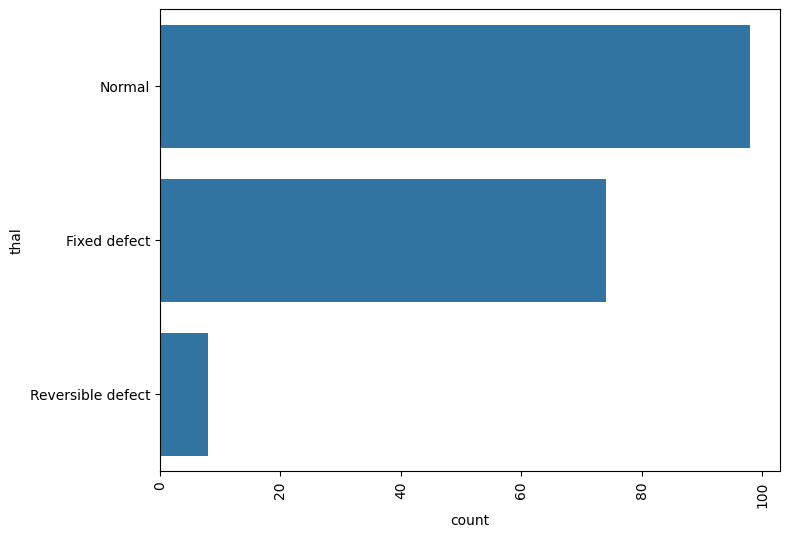

In [497]:
# Plot distribution of Thalassemia
plt.figure(figsize=(8,6))
sns.countplot(train_data['thal'])
plt.xticks(rotation="vertical")
plt.show()

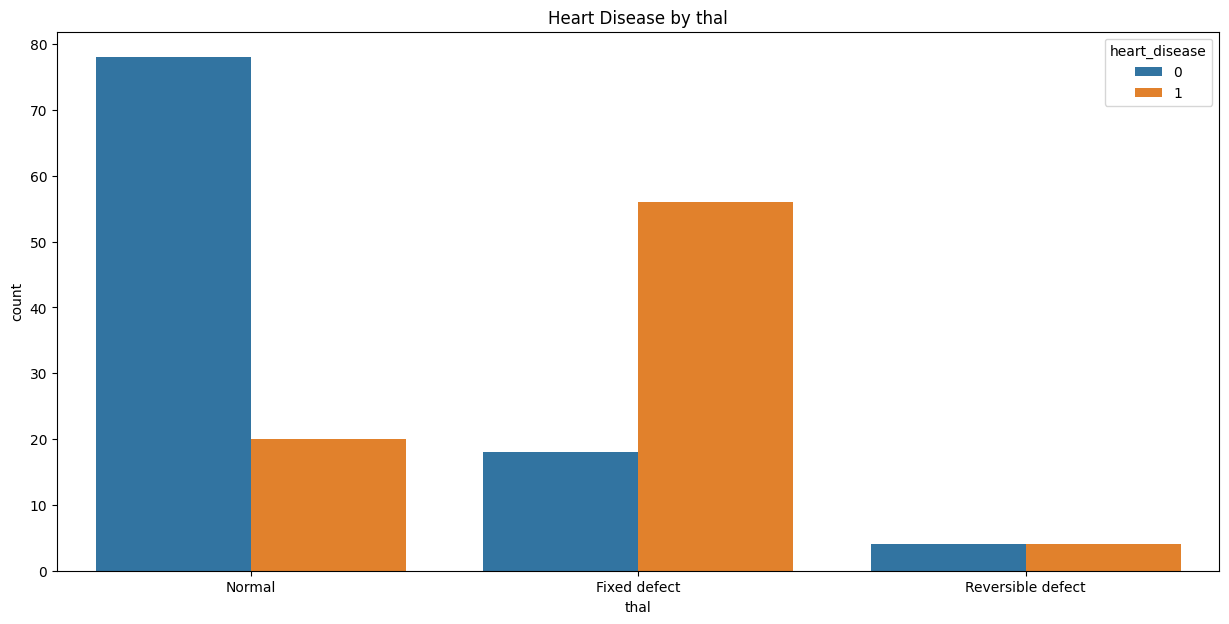

In [498]:
# Plot distribution of thal
plt.figure(figsize=(15,7))
sns.countplot(x = 'thal', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by thal")
plt.show()

##### 6. Max heart rate achieved

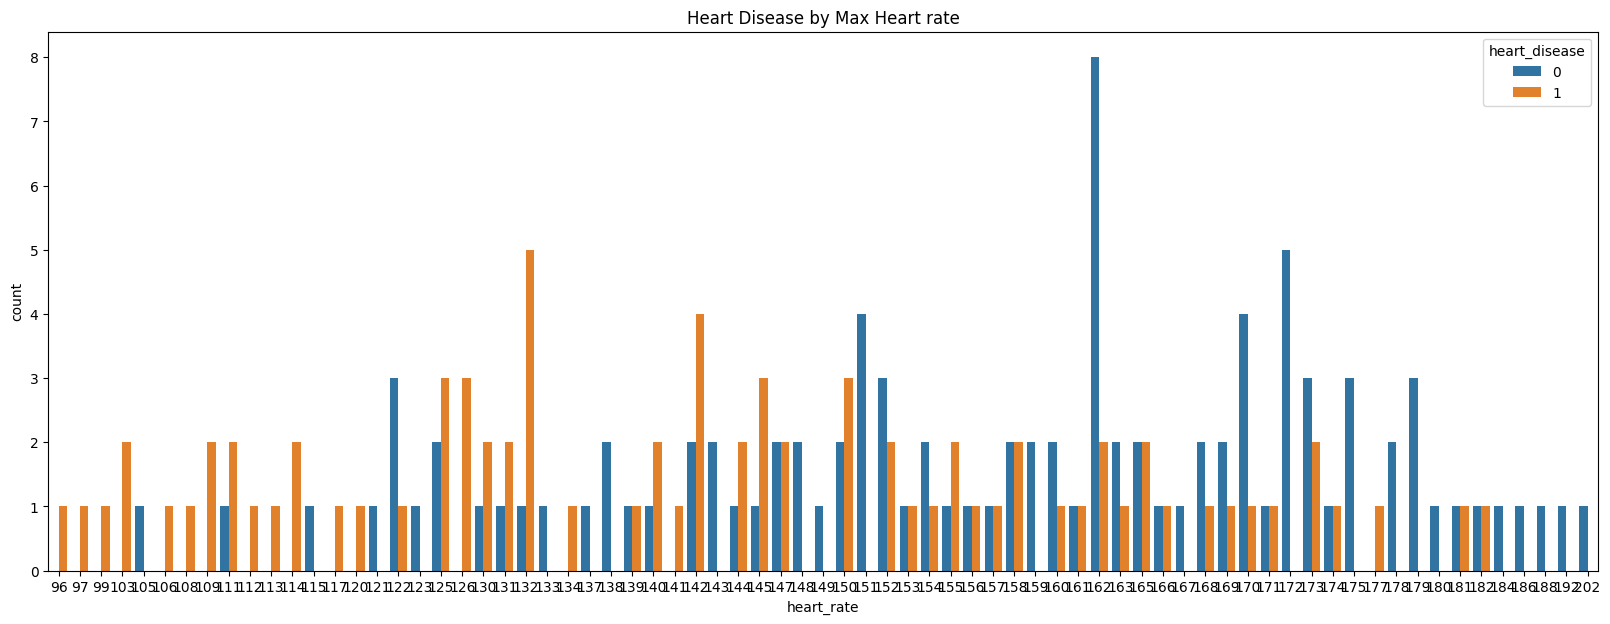

In [499]:
# Plot distribution of max_heart_rate_achieved
plt.figure(figsize=(20,7))
sns.countplot(x = 'heart_rate', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Max Heart rate")
plt.show()

In [500]:
minHeartRate = min(train_data.heart_rate)
maxHeartRate = max(train_data.heart_rate)
print('Min Heart rate :', minHeartRate)
print('Max Heart rate :', maxHeartRate)

Min Heart rate : 96
Max Heart rate : 202


##### 7. Depression induced by exercise relative to rest

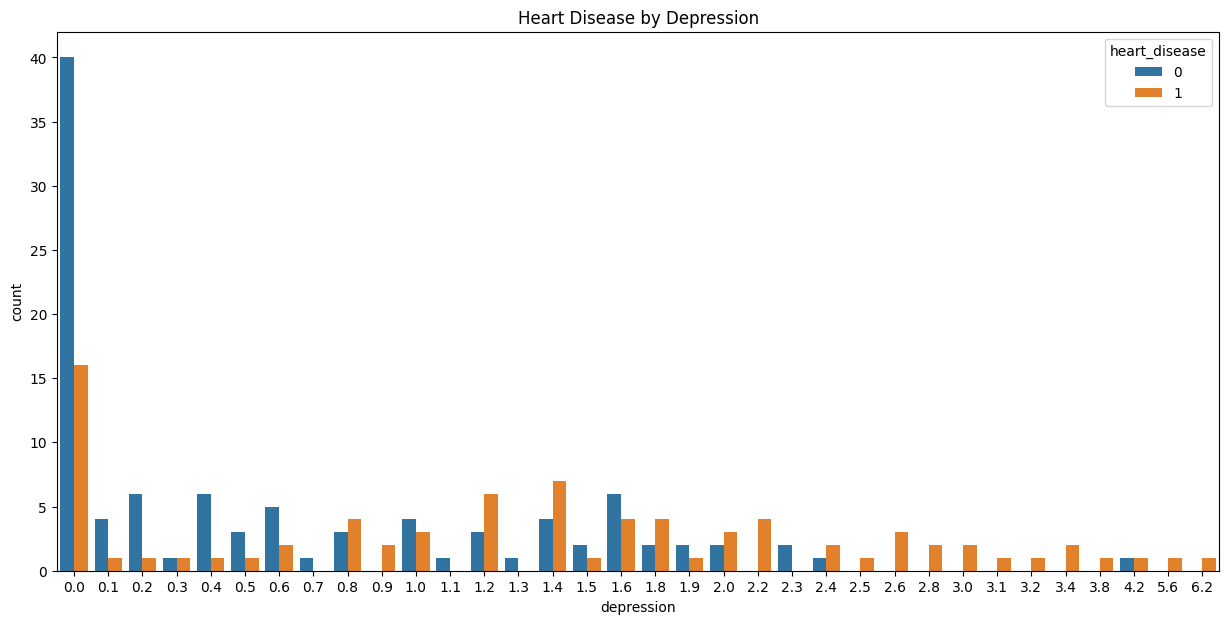

In [501]:
# Plot distribution of oldpeak_eq_st_depression
plt.figure(figsize=(15,7))
sns.countplot(x = 'depression', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Depression")
plt.show()

##### 8. Resting blood pressure

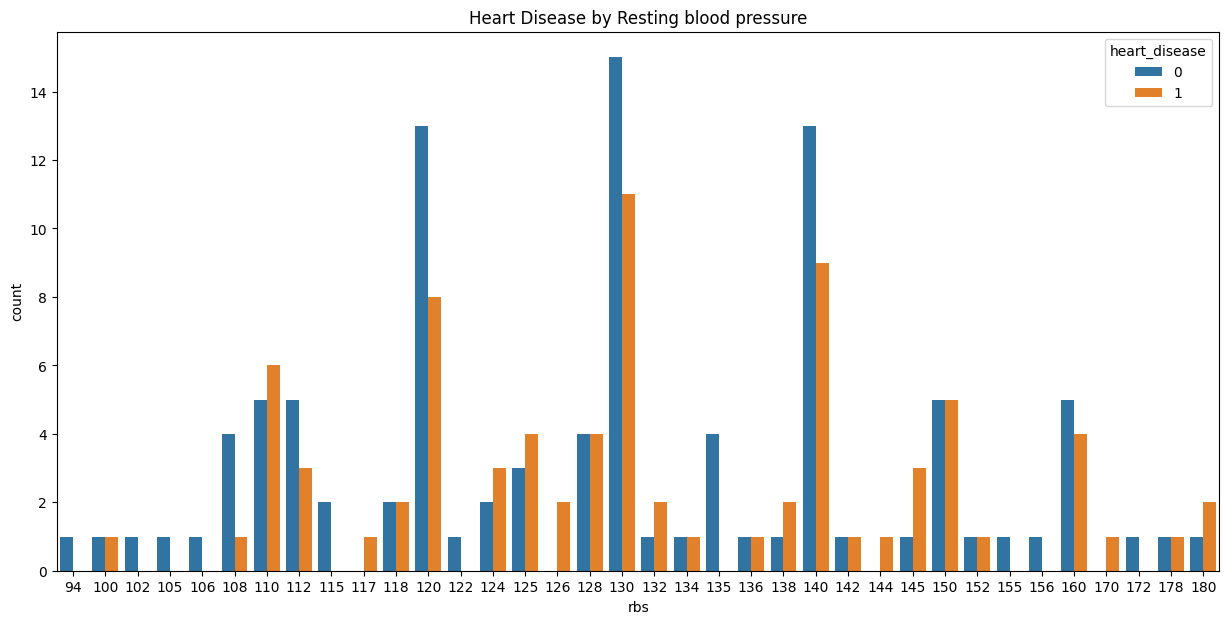

In [502]:
# Plot distribution of resting_blood_pressure
plt.figure(figsize=(15,7))
sns.countplot(x = 'rbs', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Resting blood pressure")
plt.show()

##### 9. Cholesterol level (mg/dl)

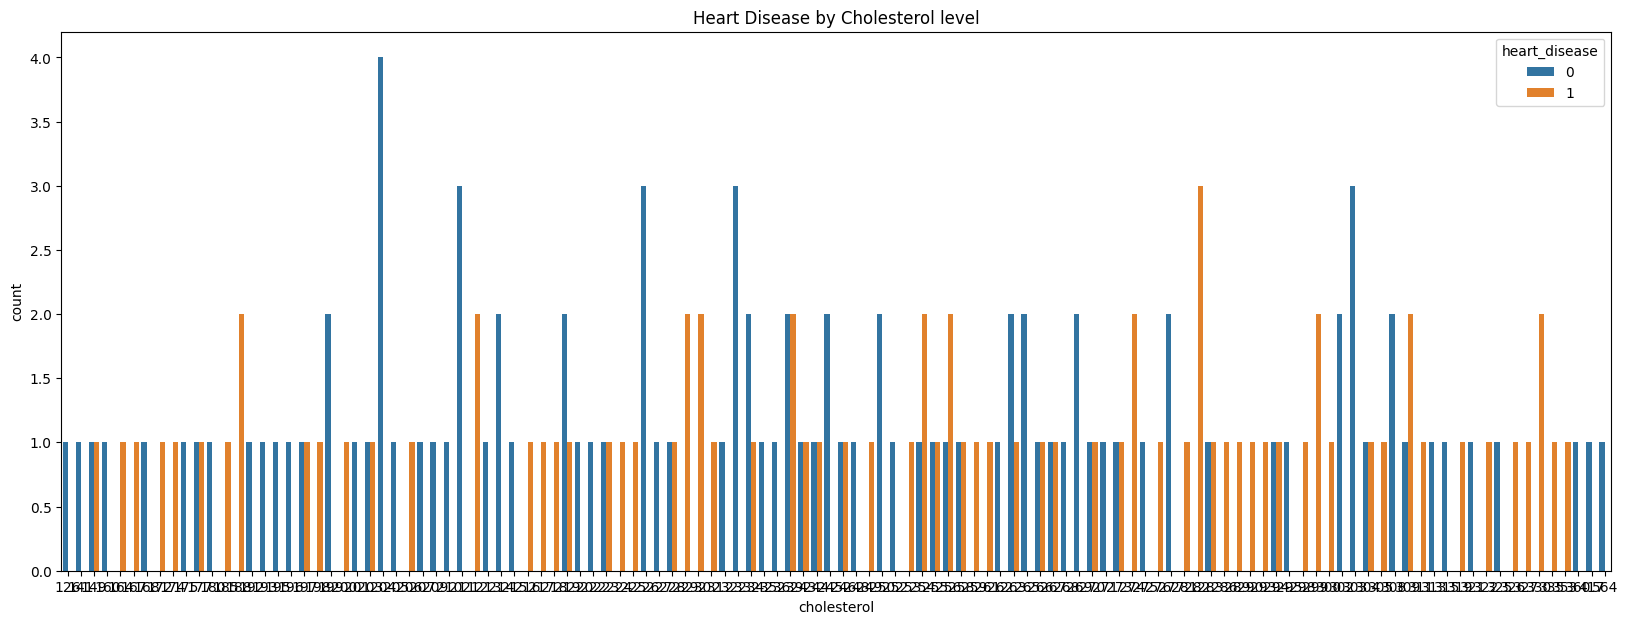

In [503]:
# Plot distribution of serum_cholesterol_mg_per_dl
plt.figure(figsize=(20,7))
sns.countplot(x = 'cholesterol', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Cholesterol level")
plt.show()

##### 10. Exercise-induced Angina

In [504]:
train_data['angina'].value_counts()

,count
angina,
0,123
1,57


In [505]:
train_data['angina'].replace([1, 0], ['True', 'False'], inplace=True)

In [506]:
train_data['angina'].value_counts()

,count
angina,
False,123
True,57


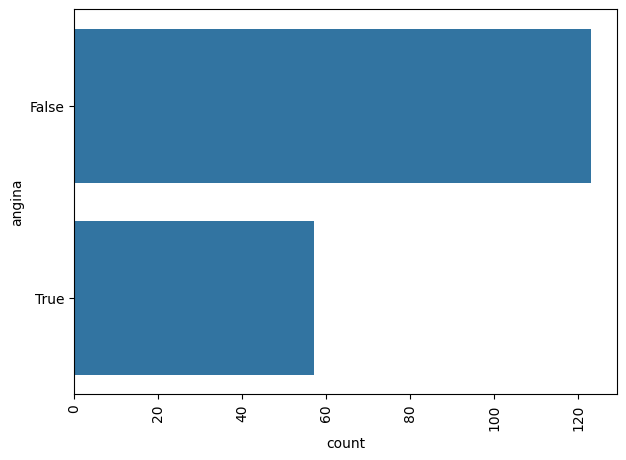

In [507]:
# Plot distribution of exercise_induced_angina
plt.figure(figsize=(7,5))
sns.countplot(train_data['angina'])
plt.xticks(rotation="vertical")
plt.show()

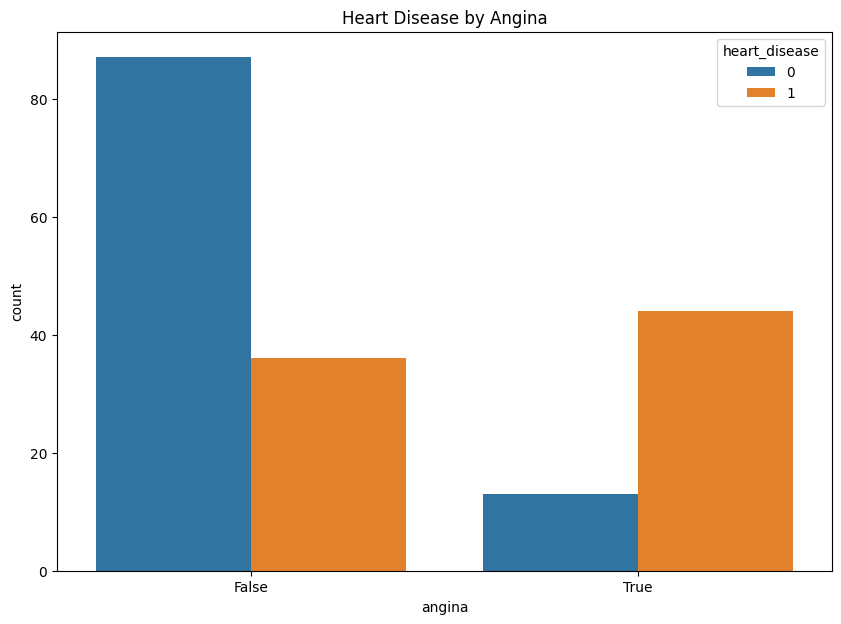

In [508]:
# Plot distribution of angina
plt.figure(figsize=(10,7))
sns.countplot(x = 'angina', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Angina")
plt.show()

##### 11. Fasting blood sugar (> 120 mg/dl)

In [509]:
train_data['fasting_blood_sugar'].value_counts()

,count
fasting_blood_sugar,
0,151
1,29


In [510]:
train_data['fasting_blood_sugar'].replace([1, 0], ['Greater than 120mg/ml', 'Lower than 120mg/ml'], inplace=True)

In [511]:
train_data['fasting_blood_sugar'].value_counts()

,count
fasting_blood_sugar,
Lower than 120mg/ml,151
Greater than 120mg/ml,29


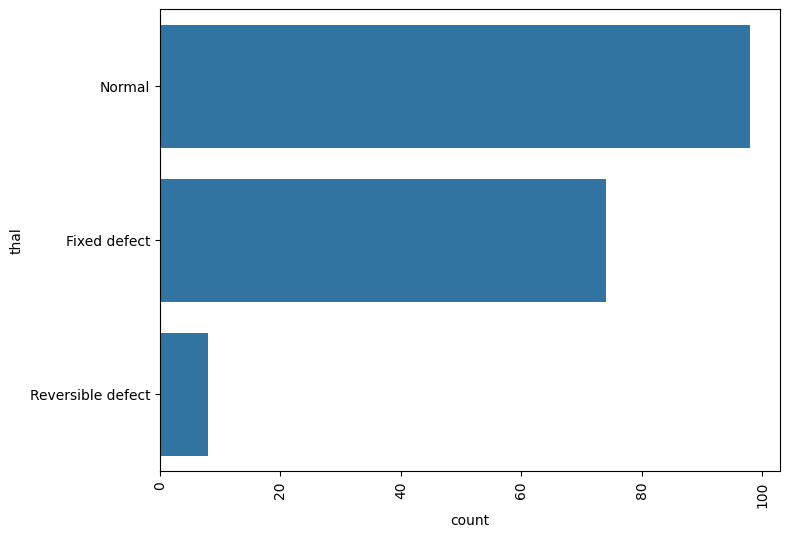

In [512]:
# Plot distribution of fasting_blood_sugar_gt_120_mg_per_dl
plt.figure(figsize=(8,6))
sns.countplot(train_data['thal'])
plt.xticks(rotation="vertical")
plt.show()

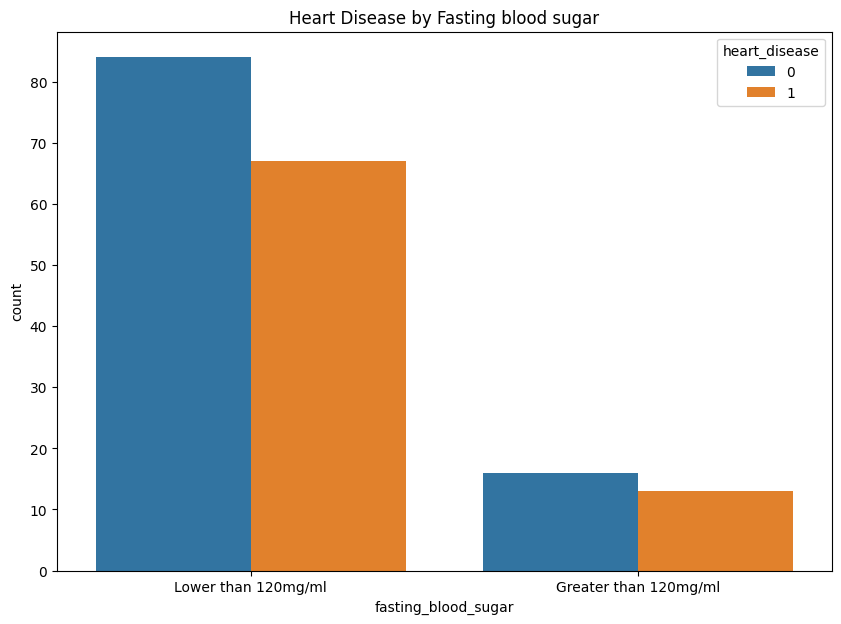

In [513]:
# Plot distribution of fasting_blood_sugar_gt_120_mg_per_dl
plt.figure(figsize=(10,7))
sns.countplot(x = 'fasting_blood_sugar', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Fasting blood sugar")
plt.show()

##### 12. Resting electrocardiography

In [514]:
train_data['resting_ekg'].value_counts()

,count
resting_ekg,
2,94
0,85
1,1


In [515]:
train_data['resting_ekg'].replace([0, 1, 2], ['Normal', 'STT Abnormality', 'Hypertrophy'], inplace=True)

In [516]:
train_data['resting_ekg'].value_counts()

,count
resting_ekg,
Hypertrophy,94
Normal,85
STT Abnormality,1


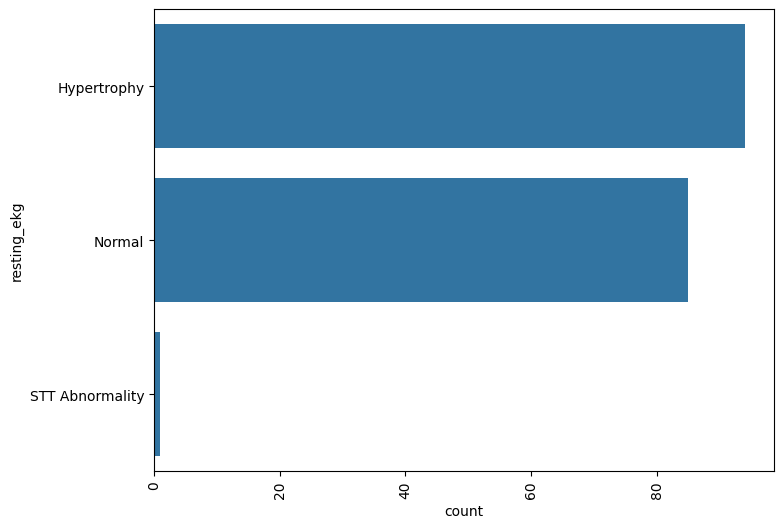

In [517]:
# Plot distribution of resting_ekg
plt.figure(figsize=(8,6))
sns.countplot(train_data['resting_ekg'])
plt.xticks(rotation="vertical")
plt.show()

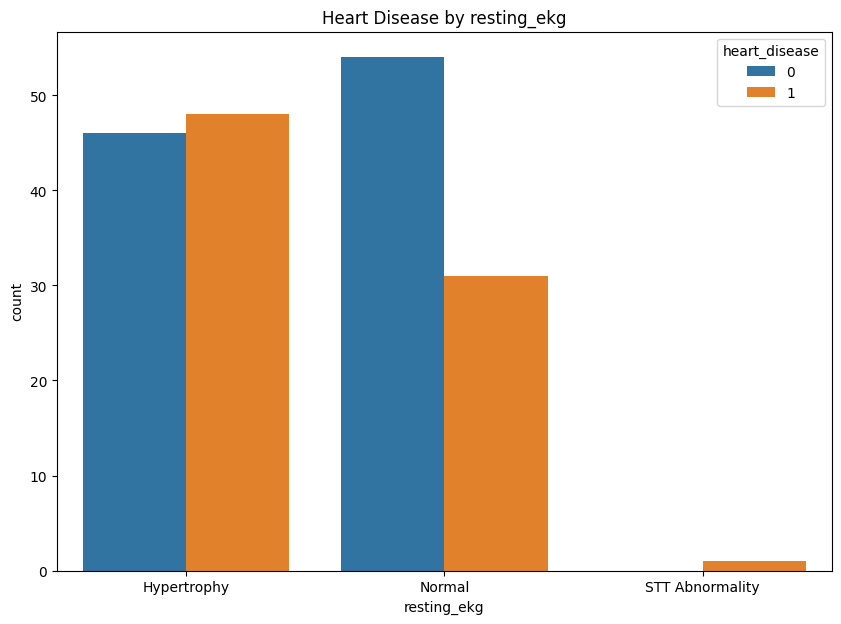

In [518]:
# Plot distribution of resting_ekg
plt.figure(figsize=(10,7))
sns.countplot(x = 'resting_ekg', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by resting_ekg")
plt.show()

##### 13. Vessels

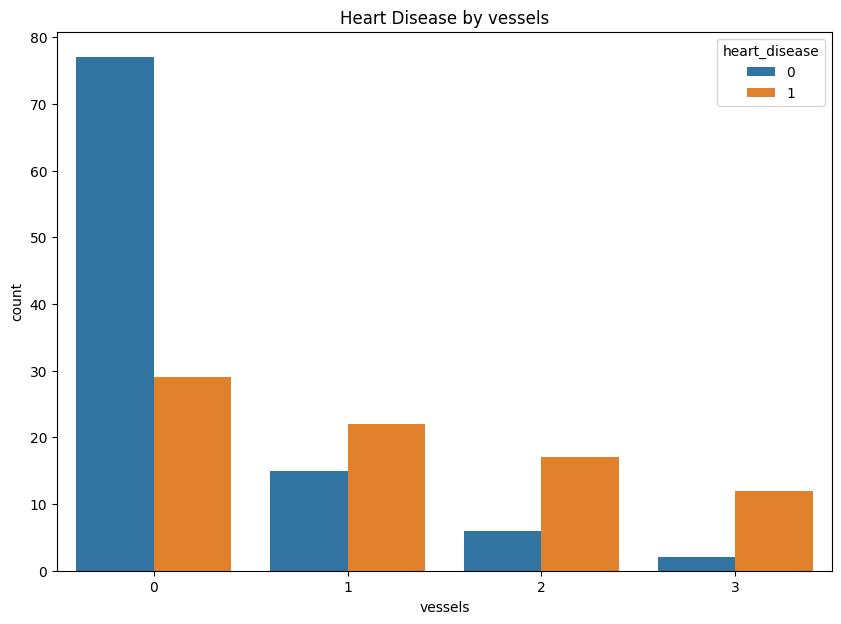

In [519]:
# Plot distribution of vessels
plt.figure(figsize=(10,7))
sns.countplot(x = 'vessels', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by vessels")
plt.show()

##### Target column

heart_disease
0    100
1     80
Name: count, dtype: int64


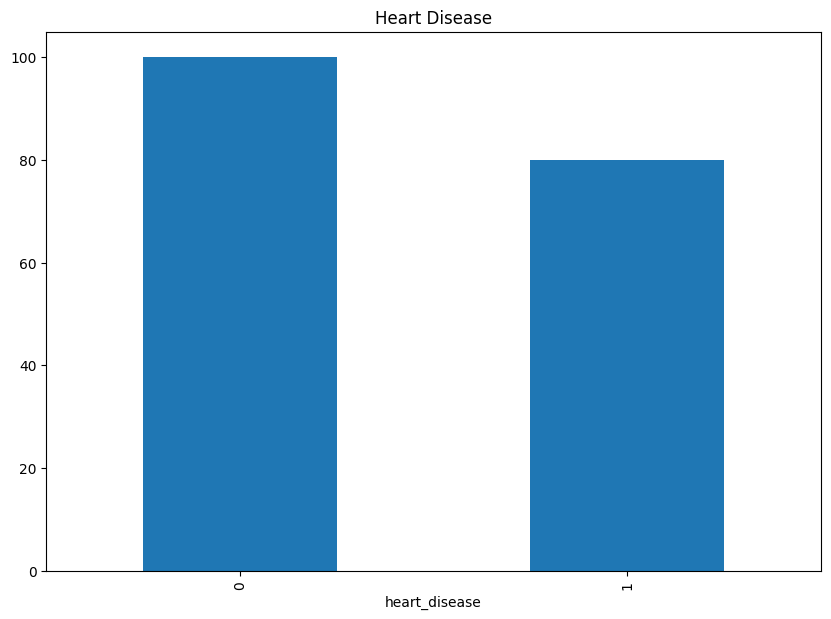

In [520]:
# Let’s check how well our outcome column is balanced
print(train_data['heart_disease'].value_counts())

plt.figure(figsize=(10,7))
train_data['heart_disease'].value_counts().plot(kind="bar")
plt.title("Heart Disease")
plt.show()

### Data Processing

In [521]:
# Get the list of categorical values
print("Categorical features: ")
categorical_val

Categorical features: 


['slope',
 'thal',
 'chest_pain',
 'vessels',
 'fasting_blood_sugar',
 'resting_ekg',
 'sex',
 'angina',
 'heart_disease']

In [522]:
columns = ['slope', 'thal', 'rbs', 'chest_pain', 'vessels', 'fasting_blood_sugar',
           'resting_ekg', 'cholesterol', 'depression', 'sex', 'age', 'heart_rate', 'angina', 'heart_disease']
uniqueVal = []

for col in columns:
    if col in categorical_val:
        print(col,':', train_data[col].nunique())
        uniqueVal.append(train_data[col].nunique())

print('Total Unique values from categorical data: ', sum(uniqueVal))

slope : 3
thal : 3
chest_pain : 4
vessels : 4
fasting_blood_sugar : 2
resting_ekg : 3
sex : 2
angina : 2
heart_disease : 2
Total Unique values from categorical data:  25


### Correlation Matrix

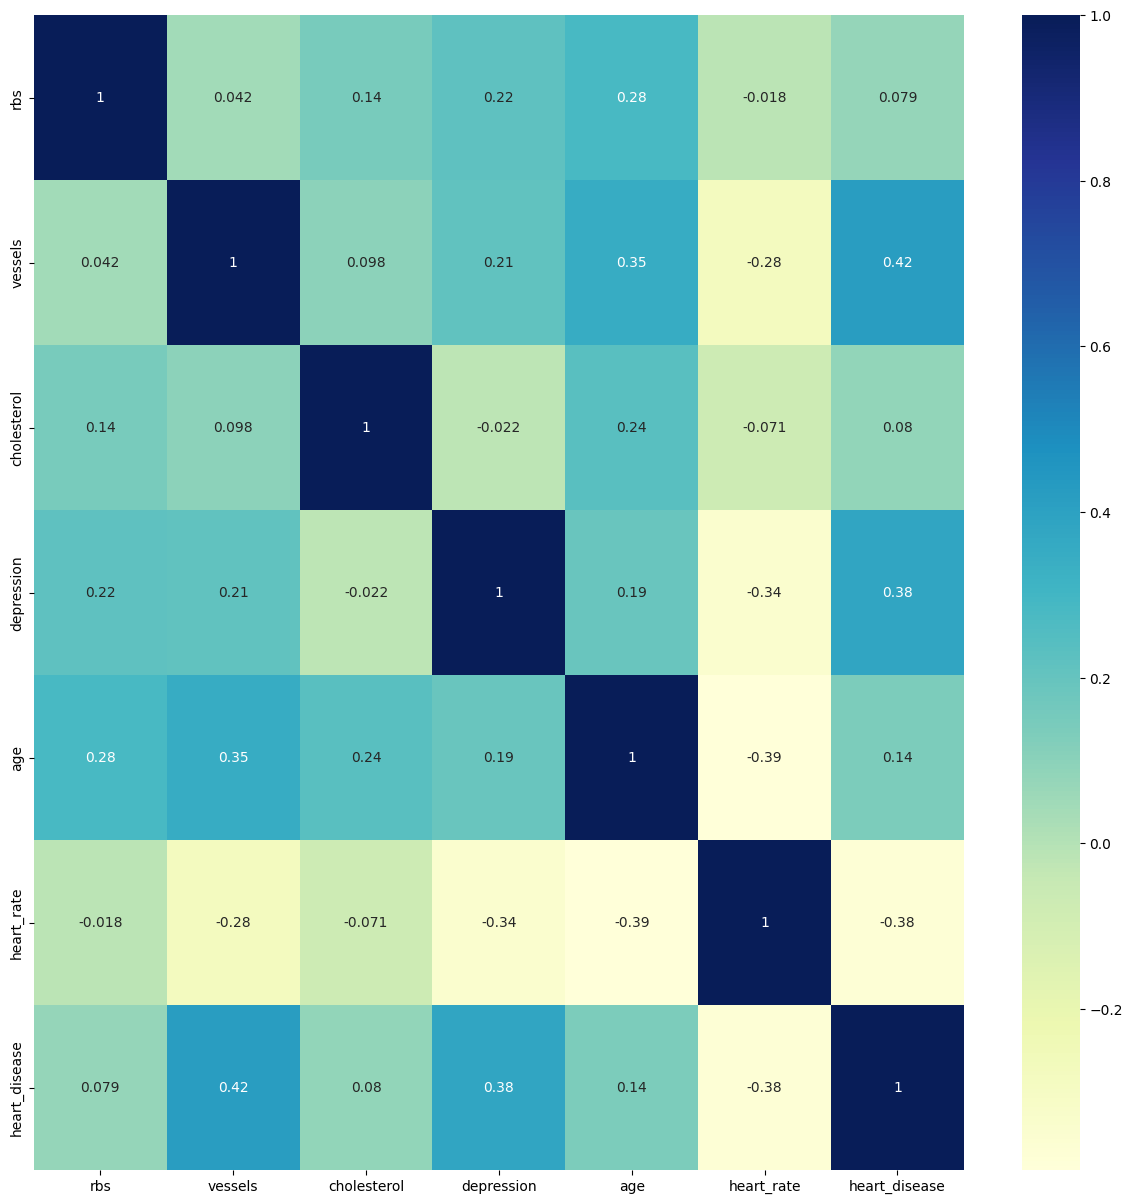

In [523]:
# Drop non-numeric columns
train_data_numeric = train_data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = train_data_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

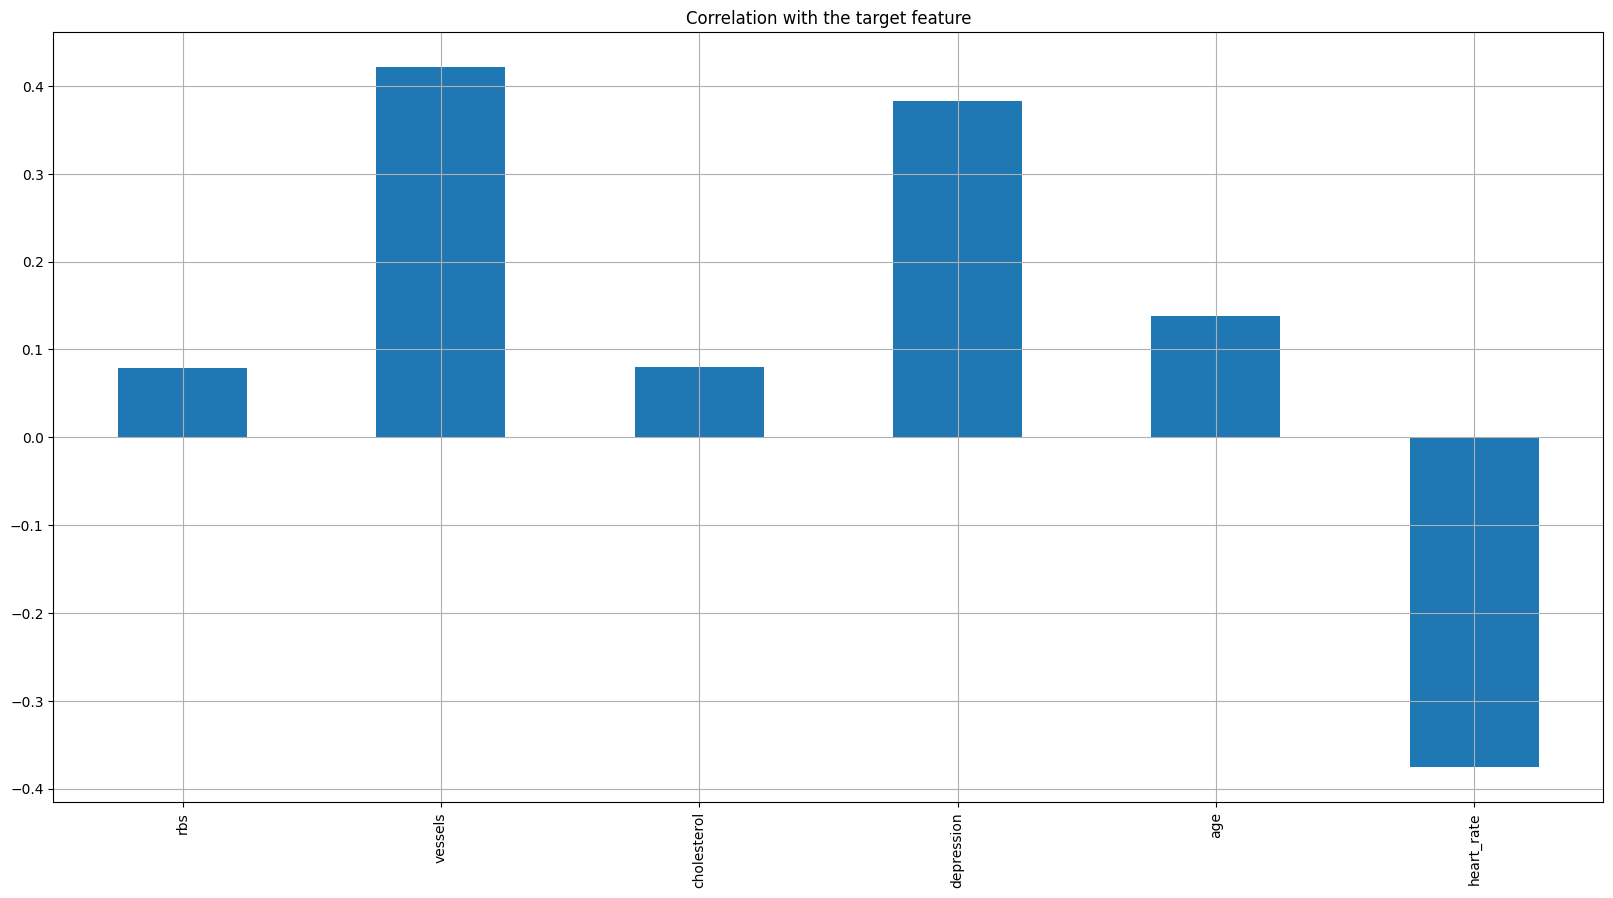

In [524]:
train_data_numeric.drop('heart_disease', axis=1).corrwith(train_data_numeric.heart_disease).plot(kind='bar', grid=True, figsize=(20, 10),
                                                                                                 title="Correlation with the target feature")
plt.show()

In [525]:
# Only 1 feature 'heart_rate' is negatively correlated with the target feature
# 'fasting_blood_sugar' is the least correlated with the target variable.

In [526]:
# Get the list of categorical values
print("Categorical features: ")
categorical_val

Categorical features: 


['slope',
 'thal',
 'chest_pain',
 'vessels',
 'fasting_blood_sugar',
 'resting_ekg',
 'sex',
 'angina',
 'heart_disease']

### Building our model

In [527]:
# Define the 'features' and 'labels'
X = train_data.drop('heart_disease', axis='columns')
y = train_data['heart_disease']

In [528]:
# Define train : test dataset in 70 : 30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [529]:
X_train.head(5)

,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
46,Flat,Normal,125,Non-Anginal pain,0,Greater than 120mg/ml,Hypertrophy,245,2.4,Male,51,166,False
85,Upsloping,Normal,118,Non-Anginal pain,3,Lower than 120mg/ml,Hypertrophy,149,0.8,Male,49,126,False
152,Flat,Fixed defect,120,Asmyptomatic,0,Lower than 120mg/ml,Normal,198,1.6,Male,35,130,True
82,Downsloping,Fixed defect,110,Atypical Angina,0,Lower than 120mg/ml,Normal,229,1.0,Male,48,168,False
147,Flat,Normal,134,Typical Angina,2,Lower than 120mg/ml,Normal,234,2.6,Male,61,145,False


### Logistic Regression model

In [530]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [531]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),[0,1,3,4,5,6,9,12])
], remainder='passthrough')

# Logistic Regression model
from sklearn.linear_model import LogisticRegression
trf2 = LogisticRegression()

# Create Pipeline
log_model = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
log_model.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred = log_model.predict(X_train)
y_pred1 = log_model.predict(X_test)

In [532]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred)*100
test_score = accuracy_score(y_test, y_pred1)*100

# Create a dataframe to display accuracy
results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,88.888889,81.481481


In [533]:
# Calculate the log loss -> lower loss scores are better
from sklearn.metrics import log_loss

clf_probs = log_model.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.45766270494746636


### Support Vector Machine (SVM) model

In [534]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),[0,1,3,4,5,6,9,12])
], remainder='passthrough')

# SVM model
from sklearn.svm import SVC
trf2 = SVC(kernel='rbf', gamma=0.01, C=1, probability=True)

# Create Pipeline
svm = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
svm.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred2 = svm.predict(X_train)
y_pred3 = svm.predict(X_test)

In [535]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred2)*100
test_score = accuracy_score(y_test, y_pred3)*100

# Create a dataframe to display accuracy
results_df1 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df1

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Support Vector Machine,99.206349,48.148148


In [536]:
from sklearn.metrics import log_loss
clf_probs = svm.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.7234236512254456


In [537]:
results_df = pd.concat([results_df, results_df1], ignore_index=True)
results_df

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,88.888889,81.481481
1,Support Vector Machine,99.206349,48.148148


### Random Forest Classifier

In [538]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),[0,1,3,4,5,6,9,12])
], remainder='passthrough')

# Random Forest model
from sklearn.ensemble import RandomForestClassifier
trf2 = RandomForestClassifier(n_estimators=100)

# Create Pipeline
rfc = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
rfc.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred4 = rfc.predict(X_train)
y_pred5 = rfc.predict(X_test)

In [539]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred4)*100
test_score = accuracy_score(y_test, y_pred5)*100

# Create a dataframe to display accuracy
results_df2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df2

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Random Forest Classifier,100.0,79.62963


In [540]:
from sklearn.metrics import log_loss
clf_probs = rfc.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.4816493388843615


In [541]:
results_df = pd.concat([results_df, results_df2], ignore_index=True)
results_df

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,88.888889,81.481481
1,Support Vector Machine,99.206349,48.148148
2,Random Forest Classifier,100.000000,79.629630


### XGBoost Classifier

In [542]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),[0,1,3,4,5,6,9,12])
], remainder='passthrough')

# XGBoost model
import xgboost as xgb
from xgboost import XGBClassifier
trf2 = XGBClassifier(max_depth=5)

# Create Pipeline
xgb_clf = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
xgb_clf.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred6 = xgb_clf.predict(X_train)
y_pred7 = xgb_clf.predict(X_test)

In [543]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred6)*100
test_score = accuracy_score(y_test, y_pred7)*100

# Create a dataframe to display accuracy
results_df3 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df3

,Model,Training Accuracy(%),Testing Accuracy(%)
0,XGBoost Classifier,100.0,77.777778


##### Hyperparameter tuning in XGBoost Classifier

In [544]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),[0,1,3,4,5,6,9,12])
], remainder='passthrough')

# XGBoost Regressor with optimal hyperparameters
import xgboost as xgb
from xgboost import XGBClassifier
trf2 = XGBClassifier(gamma=0,
                    learning_rate=0.2,
                    max_depth=6,
                    n_estimators=1000,
                    subsample=0.5,
                    colsample_bylevel=0.6,
                    colsample_bytree=0.4,
                    min_child_weight=1.0)

# Create Pipeline
xgb = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
xgb.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred8 = xgb.predict(X_train)
y_pred9 = xgb.predict(X_test)

In [545]:
print("Score: ", xgb.score(X_test, y_test))

Score:  0.7962962962962963


In [546]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred8)*100
test_score = accuracy_score(y_test, y_pred9)*100

# Create a dataframe to display accuracy
results_df4 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df4

,Model,Training Accuracy(%),Testing Accuracy(%)
0,XGBoost Classifier,100.0,79.62963


In [547]:
from sklearn.metrics import log_loss
clf_probs = xgb.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.8351936529056073


In [548]:
results_df = pd.concat([results_df, results_df4], ignore_index=True)
results_df

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,88.888889,81.481481
1,Support Vector Machine,99.206349,48.148148
2,Random Forest Classifier,100.000000,79.629630
3,XGBoost Classifier,100.000000,79.629630


### LightGBM Classifier

In [549]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),[0,1,3,4,5,6,9,12])
], remainder='passthrough')

# LightGBM model
import lightgbm as lgb
from lightgbm import LGBMClassifier
trf2 = LGBMClassifier(n_estimators=20, num_leaves = 38)

# Create Pipeline
lgb_clf = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
lgb_clf.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred10 = lgb_clf.predict(X_train)
y_pred11 = lgb_clf.predict(X_test)

[LightGBM] [Info] Number of positive: 51, number of negative: 75
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 126, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404762 -> initscore=-0.385662
[LightGBM] [Info] Start training from score -0.385662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [550]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred10)*100
test_score = accuracy_score(y_test, y_pred11)*100

# Create a dataframe to display accuracy
results_df5 = pd.DataFrame(data=[["LightGBM Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df5

,Model,Training Accuracy(%),Testing Accuracy(%)
0,LightGBM Classifier,82.539683,75.925926


##### Hyperparameter tuning in LightGBM Classifier

In [551]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),[0,1,3,4,5,6,9,12])
], remainder='passthrough')

# LightGBM model with optimal hyperparameters
import lightgbm as lgb
from lightgbm import LGBMClassifier
trf2 = LGBMClassifier(gamma=0,
                    learning_rate=0.2,
                    max_depth=6,
                    n_estimators=1000,
                    subsample=0.5,
                    colsample_bylevel=0.6,
                    colsample_bytree=0.4,
                    min_child_weight=1.0)

# Create Pipeline
estimator = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
estimator.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred12 = estimator.predict(X_train)
y_pred13 = estimator.predict(X_test)

[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Number of positive: 51, number of negative: 75
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 126, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404762 -> initscore=-0.385662
[LightGBM] [Info] Start training from score -0.385662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

In [552]:
print("Score: ", estimator.score(X_test, y_test))

[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: gamma
Score:  0.7592592592592593


In [553]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred12)*100
test_score = accuracy_score(y_test, y_pred13)*100

# Create a dataframe to display accuracy
results_df6 = pd.DataFrame(data=[["LightGBM Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df6

,Model,Training Accuracy(%),Testing Accuracy(%)
0,LightGBM Classifier,100.0,75.925926


In [554]:
from sklearn.metrics import log_loss
clf_probs = estimator.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: gamma
0.8317711903248026


In [555]:
results_df = pd.concat([results_df, results_df6], ignore_index=True)
results_df

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,88.888889,81.481481
1,Support Vector Machine,99.206349,48.148148
2,Random Forest Classifier,100.000000,79.629630
3,XGBoost Classifier,100.000000,79.629630
4,LightGBM Classifier,100.000000,75.925926


### Saving our models

In [556]:
import pickle

# First, we will use the dump() function to save the model using pickle
saved_model1 = pickle.dumps(log_model)
saved_model2 = pickle.dumps(svm)
saved_model3 = pickle.dumps(rfc)
saved_model4 = pickle.dumps(xgb)
saved_model5 = pickle.dumps(estimator)

# Then, we will load that saved model
log_from_pickle = pickle.loads(saved_model1)
svm_from_pickle = pickle.loads(saved_model2)
rfc_from_pickle = pickle.loads(saved_model3)
xgb_from_pickle = pickle.loads(saved_model4)
lgb_from_pickle = pickle.loads(saved_model5)

### Making predictions

In [557]:
# Finally, after loading that model we will use this to make predictions
pred = rfc_from_pickle.predict(X_test)

In [558]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df.head(10)

,Actual,Predicted
19,1,0
42,0,0
153,1,0
78,1,1
145,0,0
15,1,1
24,0,0
68,0,0
113,1,1
118,1,1


In [559]:
final_df = df['Predicted']
final_df = df.drop('Actual', axis=1)

In [560]:
X["heart_disease_present"] = final_df

In [561]:
submission = pd.DataFrame({
        "patient_id": data["patient_id"],
        "heart_disease_present": X["heart_disease_present"]
})

In [562]:
export_csv = submission.to_csv(r'/content/predictions(1).csv',
                               index=None, header=True)
print("Successfully Exported!!")

Successfully Exported!!


### Visualizing predicted values

In [563]:
pred_df = pd.read_csv(r"/content/predictions(1).csv")

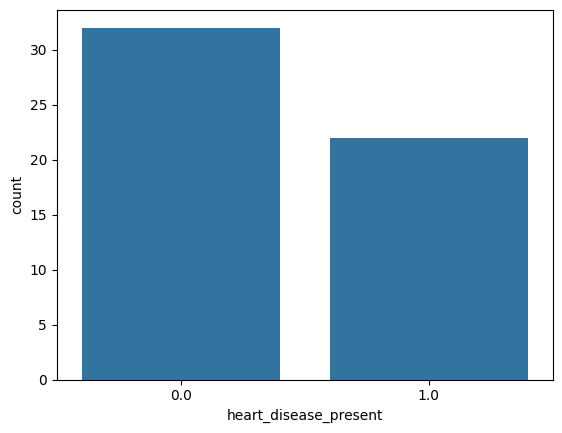

In [564]:
sns.countplot(x="heart_disease_present", data=pred_df)
plt.show()

### Dump our models into a pickle file

In [565]:
# dump the ML models into a 'pickle' file
import pickle

pickle.dump(train_data, open(r'/content/data(1).pkl', 'wb'))
pickle.dump(rfc, open(r'/content/model(1).pkl', 'wb'))